In [1]:
import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import threading
import os
from IPython.display import clear_output

In [2]:
file = 'myDATA/00-collaboration_df_with_starting_years.csv'
collaborations_df = pd.read_csv(file)
collaborations_df

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,start_year
0,6508297663,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,8,8,8,8,2005
1,34571759000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,5,5,5,2015
2,7004267341,0,0,0,0,0,0,0,0,0,...,10,10,16,16,16,16,16,16,16,2008
3,8642393600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,7,7,7,2015
4,55873955900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,8,8,8,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255095,6507630481,0,0,0,0,0,0,0,0,0,...,18,18,18,18,29,29,29,29,29,2002
255096,24577815500,0,0,0,0,0,0,0,0,0,...,4,4,4,6,13,16,16,16,70,2005
255097,57195243976,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,8,8,2010
255098,35328962100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,2014


In [4]:
num_auths_by_y = []
num_new_auths_by_y = []

num_colls_by_y = []
num_new_colls_by_y = []

YEARS = [str(year) for year in range(1990,2019)]  
tot_auth = 0
for i in range(len(YEARS)):
    
    y = YEARS[i]
    
    # number of new authors in the given year
    num_new_auths_by_y.append(len(collaborations_df.loc[collaborations_df["start_year"] == int(y)]))
    
    # total number of new authors in the given year
    tot_auth += num_new_auths_by_y[i]                         
    num_auths_by_y.append(tot_auth)
    
    # total number of collaborations in the given year
    num_colls_by_y.append(collaborations_df[y].sum())
    
    # number of new collaborations in the given year
    if(i==0):
        num_new_colls_by_y.append(num_colls_by_y[i])
    else:
        num_new_colls_by_y.append(num_colls_by_y[i] - num_colls_by_y[i-1])

<function matplotlib.pyplot.show(close=None, block=None)>

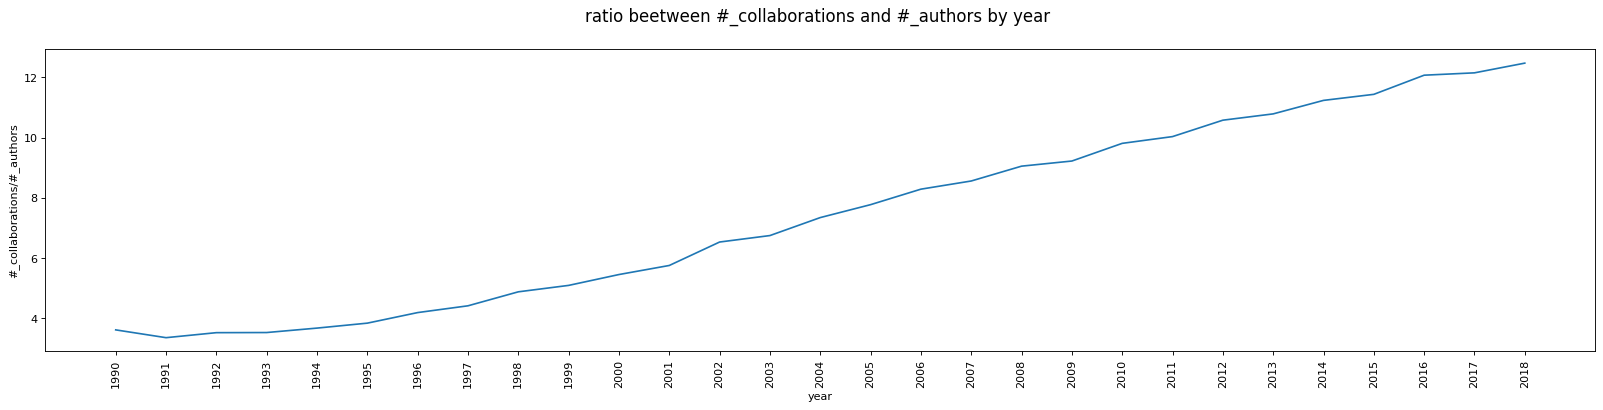

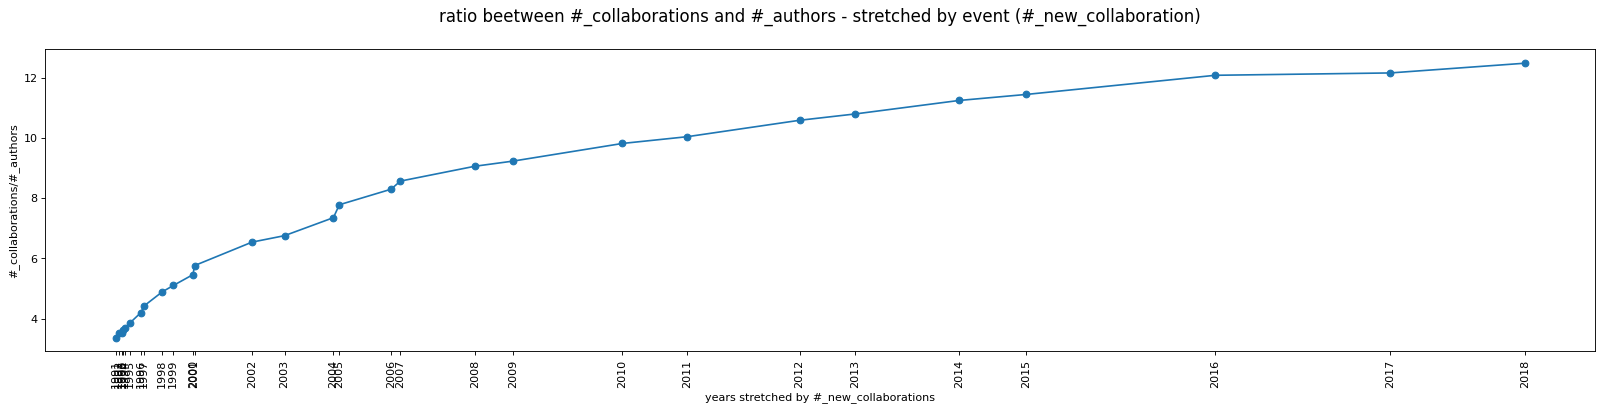

In [17]:
# plotting ration between #collaborations/#authors using time steps of one year 

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("year")
plt.ylabel("#_collaborations/#_authors")
plt.title("ratio beetween #_collaborations and #_authors by year \n", fontdict = {'fontsize' : 15})

ratios = [ num_colls_by_y[i]/num_auths_by_y[i] for i in range(len(YEARS))]

plt.xticks(rotation='vertical')
plt.plot(YEARS,ratios)
plt.show

# plotting ration between #collaborations/#authors using new_collaborations as time step 

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("years stretched by #_new_collaborations")
plt.ylabel("#_collaborations/#_authors")
plt.title("ratio beetween #_collaborations and #_authors - stretched by event (#_new_collaboration)\n", fontdict = {'fontsize' : 15})

y = num_new_colls_by_y

tmp_dist = []

for i in range(len(y)-1):
    tmp_dist.append(abs(y[i] - y[i+1]))
    
stretch_dist = [y[0], tmp_dist [0]]
for i in range(1, len(tmp_dist)):
    stretch_dist.append(tmp_dist[i] + stretch_dist[i])    
stretch_dist

plt.scatter(stretch_dist,ratios)
plt.plot(stretch_dist,ratios)
plt.xticks(stretch_dist, YEARS)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

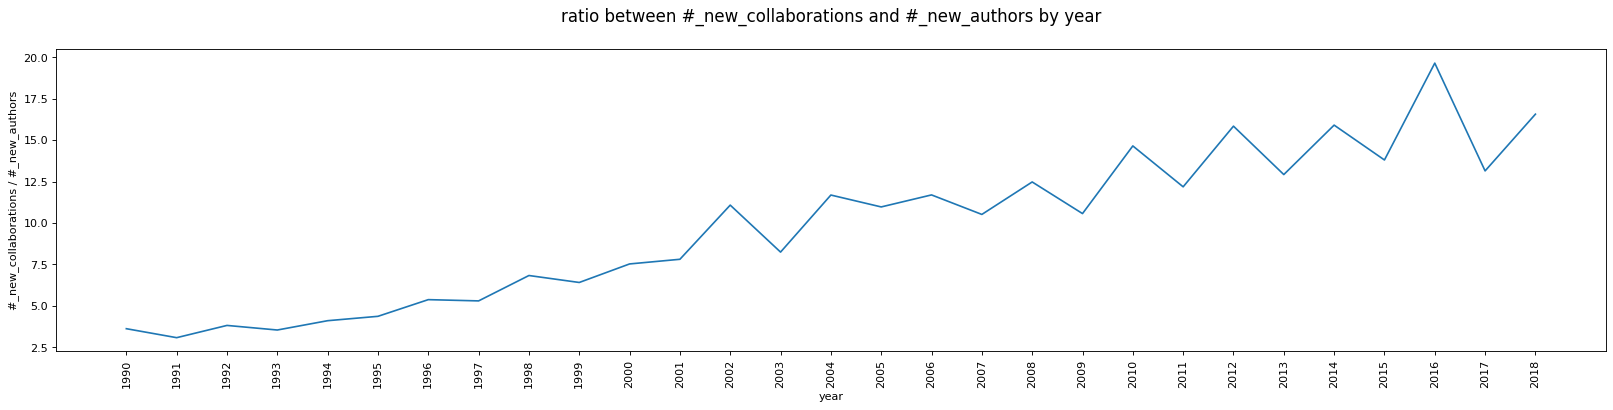

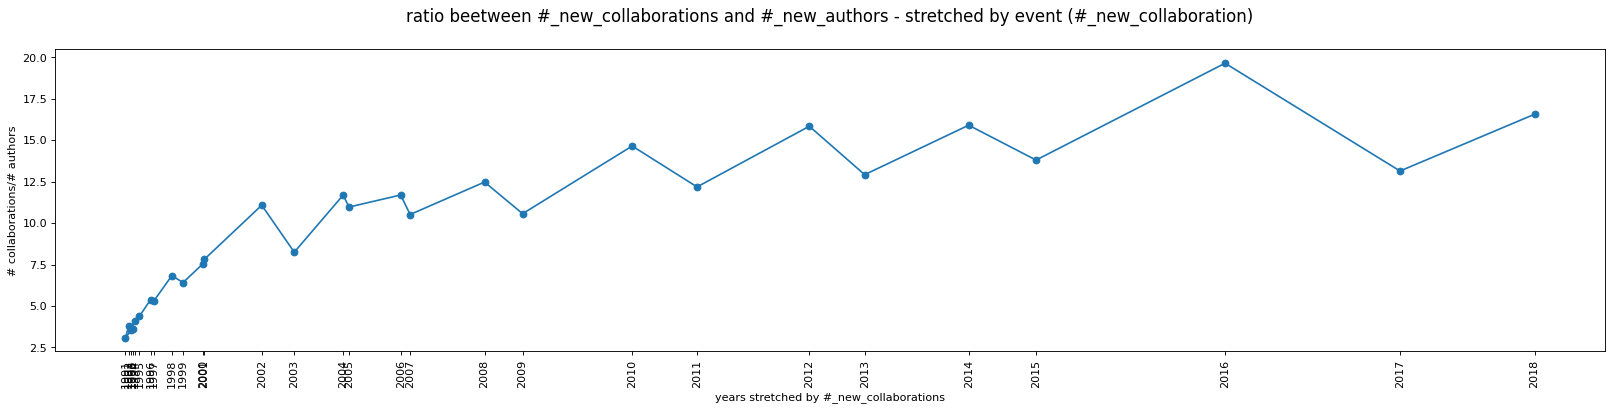

In [18]:
# plotting ration between #new_collaborations/#new_authors using time steps of one year 

x,y = [],[]
plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("year")
plt.ylabel("#_new_collaborations / #_new_authors")
plt.title("ratio between #_new_collaborations and #_new_authors by year\n", fontdict = {'fontsize' : 15})

ratios = [ num_new_colls_by_y[i]/num_new_auths_by_y[i] for i in range(len(YEARS))]

plt.xticks(rotation='vertical')
plt.plot(YEARS,ratios)
plt.show

# plotting ration between #new_collaborations/#new_authors using new_collaborations as time step 

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("years stretched by #_new_collaborations")
plt.ylabel("# collaborations/# authors")
plt.title("ratio beetween #_new_collaborations and #_new_authors - stretched by event (#_new_collaboration)\n", fontdict = {'fontsize' : 15})

y = num_new_colls_by_y

tmp_dist = []

for i in range(len(y)-1):
    tmp_dist.append(abs(y[i] - y[i+1]))
    
stretch_dist = [y[0], tmp_dist [0]]
for i in range(1, len(tmp_dist)):
    stretch_dist.append(tmp_dist[i] + stretch_dist[i])    
stretch_dist

plt.scatter(stretch_dist,ratios)
plt.plot(stretch_dist,ratios)
plt.xticks(stretch_dist, YEARS)
plt.xticks(rotation='vertical')
plt.show

In [47]:
print("num_auths_by_y \n\n", num_auths_by_y, end='\n\n')
print("num_colls_by_y \n\n", num_colls_by_y, end='\n\n')

ratios = [ num_colls_by_y[i]/num_auths_by_y[i] for i in range(len(YEARS))]
print("ratios beetween #_collaborations and #_authors by year \n\n", ratios, '\n')

print("="*150)
print("num_new_auths_by_y \n\n", num_new_auths_by_y, end='\n\n')
print("num_new_colls_by_y \n\n", num_new_colls_by_y, end='\n\n')
ratios_new = [ num_new_colls_by_y[i]/num_new_auths_by_y[i] for i in range(len(YEARS))]
print("ratio beetween #_new_collaborations and #_new_authors by year \n\n", ratios_new, '\n')


num_auths_by_y 

 [1548, 2965, 4665, 6930, 9337, 12271, 15918, 19996, 24764, 28788, 33800, 38758, 45402, 51935, 59081, 67023, 77152, 87868, 100523, 113276, 127016, 140306, 154828, 170032, 186353, 202197, 219169, 236456, 255100]

num_colls_by_y 

 [5604, 9966, 16456, 24476, 34352, 47166, 66764, 88370, 120936, 146730, 184464, 223184, 296792, 350646, 434160, 521278, 639732, 752432, 910320, 1045090, 1246396, 1408306, 1638396, 1834874, 2094494, 2313188, 2646658, 2873872, 3182760]

ratios beetween #_collaborations and #_authors by year 

 [3.62015503875969, 3.3612141652613827, 3.527545551982851, 3.531890331890332, 3.6791260576202207, 3.8436965202509983, 4.1942455082296775, 4.419383876775355, 4.883540623485705, 5.0969153814089205, 5.457514792899408, 5.758398266164405, 6.536980749746707, 6.7516318475016845, 7.348555373131802, 7.777598734762694, 8.291839485690584, 8.563208449037193, 9.055837967430339, 9.226049648645786, 9.812905460729358, 10.037389705358288, 10.582039424393521, 10.7913451585583